In [1]:
from math import exp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm as cmplt

import sys
sys.path.insert(0, '../../opticalforces')

from beam import ScalarBesselGaussBeamSuperposition
from particle import SphericalParticle

# Truncated Bessel Beam
tbb = ScalarBesselGaussBeamSuperposition()
tbb.wavelength = 632.8e-9
tbb.medium_refractive_index = 1
tbb.transversal_wavenumber = 4.07e4
tbb.q = 0
tbb.N = 23
tbb.R = 3.5e-3

# Truncated Gaussian Beam
tgb = ScalarBesselGaussBeamSuperposition()
tgb.wavelength = 632.8e-9
tgb.medium_refractive_index = 1
tgb.transversal_wavenumber = 0
tgb.q = 144e6
tgb.N = 81
tgb.R = 59e-6
tgb.L = 4*tgb.R**2
tgb.qr = 8/tgb.L

# Truncated Bessel-Gauss Beam
tbgb = ScalarBesselGaussBeamSuperposition()
tbgb.wavelength = 632.8e-9
tbgb.medium_refractive_index = 1
tbgb.transversal_wavenumber = 4.07e4
tbgb.q = 1.44e6
tbgb.R = 1e-3
tbgb.N = 30
tbgb.L = 10*tbgb.R**2
tbgb.qr = tbgb.q

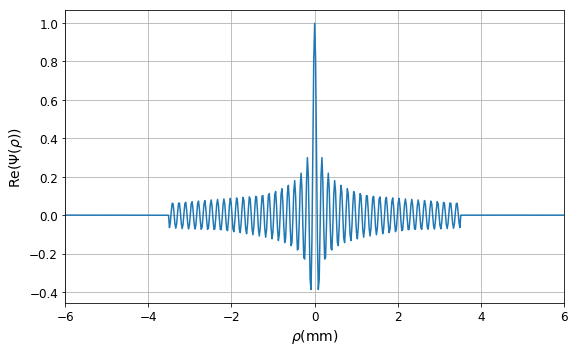

In [14]:
# ----- figure 1 -----
rho = np.linspace(-6e-3, 6e-3, 551)

plt.figure(1, figsize=(5*1.618, 5))

plt.plot([r*1e3 for r in rho], [tbb.psi(r, 0, 0, 'cylindrical').real for r in rho])

ax = plt.gca()
ax.set_xlim([-6, 6])
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.xlabel(r'$\rho$(mm)', fontsize=14)
plt.ylabel(r'Re($\Psi$($\rho$))', fontsize=14)
plt.grid()
plt.tight_layout()
plt.savefig('fig01.png')
plt.show()

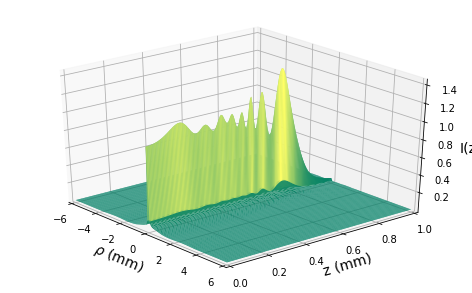

In [3]:
# ----- figure 2 -----
rho = np.linspace(-6e-3, 6e-3, 151)
z = np.linspace(0, 1, 151)
RHO, Z = np.meshgrid(rho, z)

def inty(rho, z):
    return tbb.intensity(rho, 0, z, 'cylindrical')

vinty = np.vectorize(inty)

INTY = vinty(RHO, Z)

plt.figure(2, figsize=(5*1.618, 5))
ax = plt.gca(projection='3d')

RHO = [rho/10**-3 for rho in RHO]
Z = [z for z in Z]

ax.plot_surface(RHO, Z, INTY, rcount=1000, ccount=1000, alpha=1, cmap=cmplt.summer)

ax.set_xlabel(r'$\rho$ (mm)', fontsize=14)
ax.set_xlim(-6, 6)
ax.set_ylabel(r'z (mm)', fontsize=14)
ax.set_ylim(0, 1)
zlabel = 'I(z)'
ax.set_zlabel(zlabel, fontsize=14)

ax.view_init(elev=30, azim=-40)

plt.savefig('fig02.png')
plt.show()

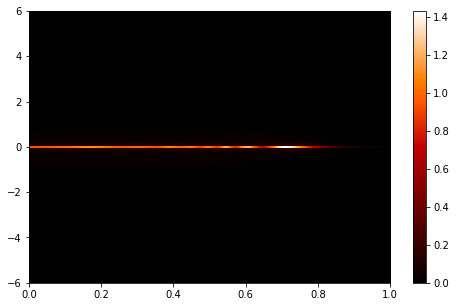

In [4]:
# ----- figure 3 -----
plt.figure(3, figsize=(5*1.618, 5))

ax = plt.gca()

im = ax.imshow(np.transpose(INTY), cmap=cmplt.gist_heat, origin="upper", extent=[0, 1, -6, 6], aspect='auto')
plt.colorbar(im)

plt.savefig('fig03.png')
plt.show()

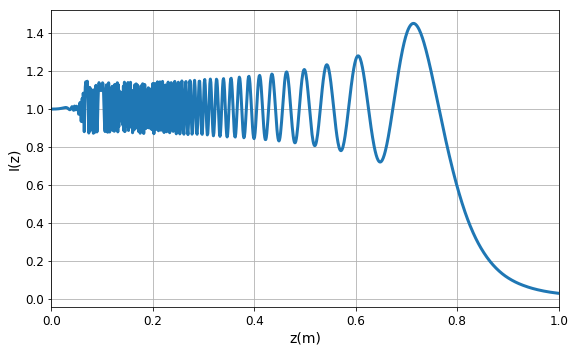

In [12]:
# ----- figure 4 -----
tbb.N = 500

z = np.linspace(0, 1, 999)

plt.figure(4, figsize=(5*1.618, 5))

plt.plot(z, [tbb.intensity(0, 0, z) for z in z], lw=3)

ax = plt.gca()
ax.set_xlim([0, 1])
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.xlabel(r'z(m)', fontsize=14)
plt.ylabel(r'I(z)', fontsize=14)
plt.grid()
plt.tight_layout()
plt.savefig('fig04.png')
plt.show()

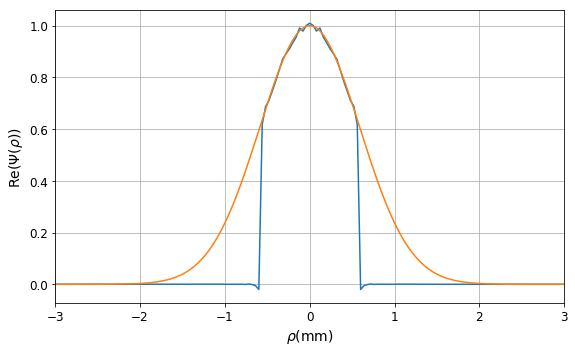

In [6]:
# ----- figure 5 -----
rho = np.linspace(-300e-6, 300e-6, 151)

plt.figure(5, figsize=(5*1.618, 5))

plt.plot([r*1e4 for r in rho], [tgb.psi(r, 0, 0, 'cylindrical').real for r in rho])
plt.plot([r*1e4 for r in rho], [exp(-tgb.q*r**2) for r in rho])

ax = plt.gca()
ax.set_xlim([-3, 3])
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.xlabel(r'$\rho$(mm)', fontsize=14)
plt.ylabel(r'Re($\Psi$($\rho$))', fontsize=14)
plt.grid()
plt.tight_layout()
plt.savefig('fig05.png')
plt.show()

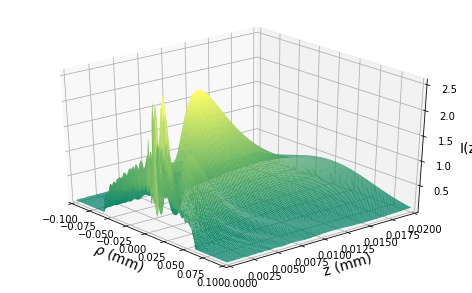

In [7]:
# ----- figure 6 -----
rho = np.linspace(-100e-6, 100e-6, 151)
z = np.linspace(0, 0.02, 151)
RHO, Z = np.meshgrid(rho, z)

def inty(rho, z):
    return tgb.intensity(rho, 0, z, 'cylindrical')

vinty = np.vectorize(inty)

INTY = vinty(RHO, Z)

plt.figure(6, figsize=(5*1.618, 5))
ax = plt.gca(projection='3d')

RHO = [rho/10**-3 for rho in RHO]
Z = [z for z in Z]

ax.plot_surface(RHO, Z, INTY, rcount=1000, ccount=1000, alpha=1, cmap=cmplt.summer)

ax.set_xlabel(r'$\rho$ (mm)', fontsize=14)
ax.set_xlim(-0.1, 0.1)
ax.set_ylabel(r'z (mm)', fontsize=14)
ax.set_ylim(0, 0.02)
zlabel = 'I(z)'
ax.set_zlabel(zlabel, fontsize=14)

ax.view_init(elev=30, azim=-40)

plt.savefig('fig06.png')
plt.show()

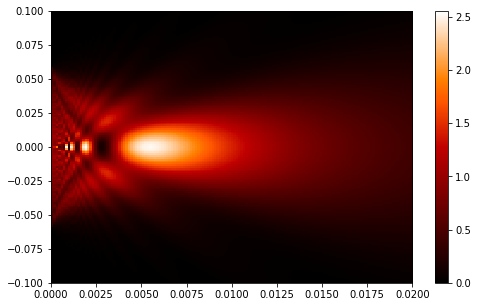

In [8]:
# ----- figure 7 -----
plt.figure(7, figsize=(5*1.618, 5))

ax = plt.gca()

im = ax.imshow(np.transpose(INTY), cmap=cmplt.gist_heat, origin="upper", extent=[0, 0.02, -0.1, 0.1], aspect='auto')
plt.colorbar(im)

plt.savefig('fig07.png')
plt.show()

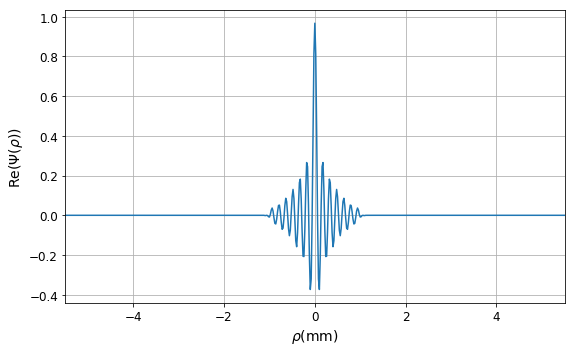

In [9]:
# ----- figure 8 -----
rho = np.linspace(-5.5e-3, 5.5e-3, 551)

plt.figure(8, figsize=(5*1.618, 5))

plt.plot([r*1e3 for r in rho], [tbgb.psi(r, 0, 0, 'cylindrical').real for r in rho])

ax = plt.gca()
ax.set_xlim([-5.5, 5.5])
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.xlabel(r'$\rho$(mm)', fontsize=14)
plt.ylabel(r'Re($\Psi$($\rho$))', fontsize=14)
plt.grid()
plt.tight_layout()
plt.savefig('fig08.png')
plt.show()

../../opticalforces/beam.py:708: RuntimeWarning: invalid value encountered in cdouble_scalars
  value = num*exp1*bessel*exp2
/usr/local/lib/python3.5/dist-packages/matplotlib/colors.py:494: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


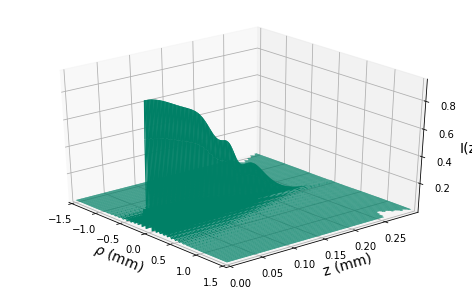

In [10]:
# ----- figure 9 -----
#tbgb.q = 14.4e6
rho = np.linspace(-1.5e-3, 1.5e-3, 151)
z = np.linspace(0, 0.3, 151)
RHO, Z = np.meshgrid(rho, z)

def inty(rho, z):
    return tbgb.intensity(rho, 0, z, 'cylindrical')

vinty = np.vectorize(inty)

INTY = vinty(RHO, Z)

plt.figure(9, figsize=(5*1.618, 5))
ax = plt.gca(projection='3d')

RHO = [rho*1e3 for rho in RHO]
Z = [z for z in Z]

ax.plot_surface(RHO, Z, INTY, rcount=1000, ccount=1000, alpha=1, cmap=cmplt.summer)

ax.set_xlabel(r'$\rho$ (mm)', fontsize=14)
ax.set_xlim(-1.5, 1.5)
ax.set_ylabel(r'z (mm)', fontsize=14)
ax.set_ylim(0, 0.3)
zlabel = 'I(z)'
ax.set_zlabel(zlabel, fontsize=14)

ax.view_init(elev=30, azim=-40)

plt.savefig('fig09.png')
plt.show()

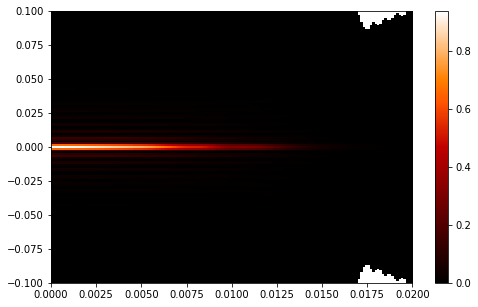

In [11]:
# ----- figure 10 -----
plt.figure(7, figsize=(5*1.618, 5))

ax = plt.gca()

im = ax.imshow(np.transpose(INTY), cmap=cmplt.gist_heat, origin="upper", extent=[0, 0.02, -0.1, 0.1], aspect='auto')
plt.colorbar(im)

plt.savefig('fig10.png')
plt.show()